In [1]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rep_fig_vis as rfv

In [ ]:
## Set general plotting parameters
rfv.set_fontsize(10)

In [43]:
## Set parameters
n_cat = 2
n_misc_rows = 2
n_misc = 5

## For this tutorial, I have made these sequential bools:
plot_axes = True
plot_content = True 
plot_extra = True

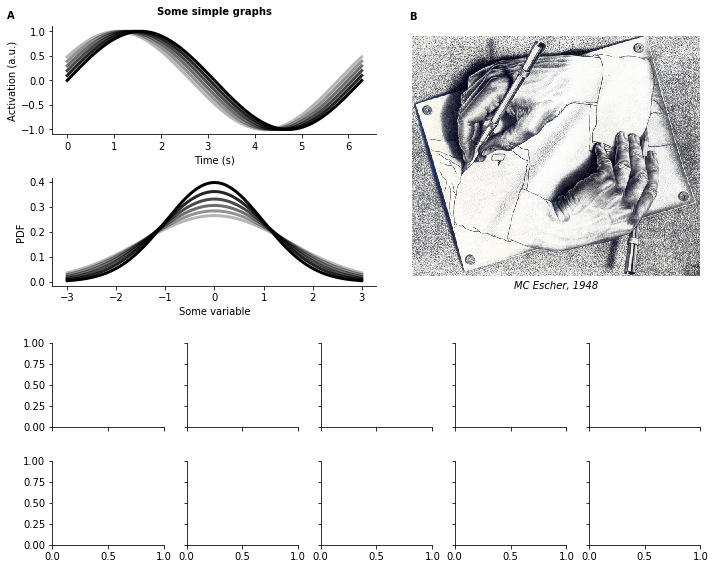

In [73]:
## Make figure:
fig = plt.figure(constrained_layout=False,  # False better when customising grids 
                 figsize=(10, 8))  # width x height in inches

## Make grids:
gs_topleft = fig.add_gridspec(ncols=1, nrows=n_cat,  # number of rows and columns
                              bottom=0.5, top=0.95, right=0.5, left=0.05,  # set bounds on 4 sides
                              wspace=0.2, hspace=0.4)  # width and height spacing between plot in this grid

gs_topright = fig.add_gridspec(ncols=1, nrows=1, 
                               bottom=0.5, top=0.95, right=0.95, left=0.55)  # leave a bit of space between grids (eg left here and right in grid above)

gs_bottom = fig.add_gridspec(ncols=n_misc, nrows=n_misc_rows,  # number of rows and columns
                            bottom=0.05, top=0.4, right=0.95, left=0.05,  # set bounds on 4 sides
                            wspace=0.2, hspace=0.4)  # width and height spacing between plot in this grid 

if plot_axes:
    ## Create axes.
    ## Add some plots in top left bit:
    ax_cat = {}
    for ii in range(n_cat):
        ax_cat[ii] = fig.add_subplot(gs_topleft[ii])  # create ax by indexing grid object
        rfv.despine(ax_cat[ii])

    ## Add image:
    ax_im = fig.add_subplot(gs_topright[0])
    rfv.naked(ax_im)

    ## Add more plots:
    ax_misc = {ii: {} for ii in range(n_misc_rows)}

    for ii in range(n_misc_rows):  # n rows
        for jj in range(n_misc):
            ax_misc[ii][jj] = fig.add_subplot(gs_bottom[ii, jj])  # 2D indexing because multiple rows & multiple columns
            curr_ax = ax_misc[ii][jj]  # easier to type
            rfv.despine(curr_ax)
            if ii == 0:  # top row:
                rfv.remove_xticklabels(curr_ax)
            if jj > 0: # not left column
                rfv.remove_yticklabels(curr_ax)

if plot_axes and plot_content:
    ## Add content to panels:
    ## Top left, let's draw some periodic functions:
    for i_sin in range(6):
        curr_alpha = 1 - i_sin / 7
        rfv.plot_sin_one_period(ax=ax_cat[0], phase=i_sin / 10, alpha=curr_alpha)
        rfv.plot_normal_distr(ax=ax_cat[1], std_distr=1 + 0.1 * i_sin, alpha=curr_alpha)

    ## Add image content
    img = mpimg.imread('drawing-hands.jpg!Large.jpg')  # load image into memroy
    ax_im.imshow(img, interpolation='none')  # generally it's best to disable interpolation (between neighbouring pixels)

if plot_extra:
    ## First way of doing text, by plt.text()
    ax_cat[0].text(s='A', x=-1.28, y=1.25,  # specify coords in data coord system of this ax
                   fontdict={'weight': 'bold'})  

    ax_im.text(s='MC Escher, 1948', x=np.mean(list(ax_im.get_xlim())), y=ax_im.get_ylim()[0] + 10,  # get ax limits to define coords
                fontdict={'ha': 'center', 'va': 'top',  # change text alignment to make centering easier
                          'style': 'italic'})               

    ## Alternatively, use annotate to specificy coords in fraction of ax or fig
    ax_im.annotate(s='B', xy=(0.572, 0.965), xycoords='figure fraction',
                   weight='bold')